<a href="https://colab.research.google.com/github/kolentokk/test/blob/master/PyTorch%E6%95%99%E7%A8%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor基本操作

In [9]:
from __future__ import print_function
import torch
x = torch.Tensor(5, 3)  # 构造一个未初始化的5*3的矩阵
print(x)
x = torch.rand(5, 3)  # 构造一个随机初始化的矩阵
print(x)
x.size()

tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28],
        [1.8176e+31, 7.2708e+31, 5.0778e+31],
        [3.2608e-12, 1.7728e+28, 7.0367e+22],
        [2.1715e-18, 2.6226e-09, 2.6587e+23],
        [5.3242e+22, 8.3092e+20, 1.9971e+20]])
tensor([[0.6438, 0.5254, 0.8015],
        [0.8777, 0.5450, 0.0079],
        [0.5094, 0.6611, 0.3465],
        [0.2991, 0.5888, 0.9335],
        [0.9578, 0.7809, 0.4834]])


torch.Size([5, 3])

In [ ]:
# torch.Size 事实上是一个tuple, 所以其支持相关的操作*
y = torch.rand(5, 3)
x + y # 语法一
torch.add(x, y) # 语法二

tensor([[0.9815, 1.2067, 1.3755],
        [0.6702, 0.5304, 0.9676],
        [0.7938, 0.7058, 0.8588],
        [1.5058, 0.9331, 1.7468],
        [1.4405, 0.6854, 0.6840]])

In [ ]:
# 另外输出tensor也有两种写法
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
y.add_(x) # 特别注明：任何可以改变tensor内容的操作都会在方法名后加一个下划线'_'，例如：x.copy_(y), x.t_(), 这俩都会改变x的值

tensor([[0.9815, 1.2067, 1.3755],
        [0.6702, 0.5304, 0.9676],
        [0.7938, 0.7058, 0.8588],
        [1.5058, 0.9331, 1.7468],
        [1.4405, 0.6854, 0.6840]])

In [ ]:
# 此处演示tensor和numpy数据结构的相互转换
a = torch.ones(5)
b = a.numpy()
# 此处演示当修改numpy数组之后,与之相关联的tensor也会相应的被修改
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
# 将numpy的Array转换为torch的Tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
# 另外除了CharTensor之外，所有的tensor都可以在CPU运算和GPU预算之间相互转换
# 使用CUDA函数来将Tensor移动到GPU上
# 当CUDA可用时会进行GPU的运算
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

autograd.Variable 这是这个包中最核心的类。 它包装了一个Tensor，并且几乎支持所有的定义在其上的操作。一旦完成了你的运算，你可以调用 .backward()来自动计算出所有的梯度。
可以通过属性 .data 来访问原始的tensor，而关于这一Variable的梯度则集中于 .grad 属性中。  
![替代文字](https://pic4.zhimg.com/80/v2-08e0530dfd6879ff2bee56cfc5cc5073_hd.jpg)

在自动求导中非常重要的类 Function
Variable 和 Function 二者相互联系并且构建了一个描述整个运算过程的无环图。每个Variable拥有一个 .creator 属性，其引用了一个创建Variable的 Function。(除了用户创建的Variable其 creator 部分是 None)。

如果你想要进行求导计算，你可以在Variable上调用.backward()。 如果Variable是一个标量（例如它包含一个单元素数据），你无需对backward()指定任何参数，然而如果它有更多的元素，你需要指定一个和tensor的形状想匹配的grad_output参数

更多关于Variable 和 Function的文档:https://link.zhihu.com/?target=http%3A//pytorch.org/docs/autograd.html

In [18]:
from torch.autograd import Variable
import torch.optim as optim
del x
#x = Variable(torch.ones(2, 2), requires_grad = True)
x = torch.ones((2, 2), requires_grad = True)

y = x + 2
#y.creator  # 错误
y.grad
# y 是作为一个操作的结果创建的因此y有一个creator ?????????????????
z = y * y * 3
out = z.mean()
# 现在我们来使用反向传播
optimizer = optim.SGD(lr=0.01)
optimizer.zero_grad()
out.backward()

# out.backward()和操作out.backward(torch.Tensor([1.0]))是等价的
# 在此处输出 d(out)/dx
x.grad

<ipython-input-18-1f1972d8ea60>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  y.grad


TypeError: ignored

In [12]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)  # 用上一个随机初始化的tensor初始化变量x?????????????????????????
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
x.grad

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])

# Part-1

In [ ]:
import torch

a = torch.randn((3,3), requires_grad = True)

w1 = torch.randn((3,3), requires_grad = True)
w2 = torch.randn((3,3), requires_grad = True)
w3 = torch.randn((3,3), requires_grad = True)
w4 = torch.randn((3,3), requires_grad = True)

b = w1*a
c = w2*a

d = w3*b + w4*c

L = 10 - d

print("The grad fn for a is", a.grad_fn)
print("The grad fn for d is", d.grad_fn)

The grad fn for a is None
The grad fn for d is <AddBackward0 object at 0x7fce077bc6a0>


In [1]:
import torch
import torch.nn as nn

#冻结某一层
# 定义一个简单的模型
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = MyModel()

# 冻结某一层的参数
for param in model.conv1.parameters():
    param.requires_grad = False

# 检查参数是否被冻结
for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv1.weight False
conv1.bias False
conv2.weight True
conv2.bias True
fc.weight True
fc.bias True


<font face=STCAIYUN color=red size=4>注意：</font>当必须冻结某些图层并在训练时阻止他们更新参数时，可以简单地将requires_grad设置为False，这些Tensors不会参与计算图。

当执行inference code时，并不计算梯度，因此不需要存储这些值。事实上，在推理过程中不需要创建任何图形，因为它将导致无用的内存消耗  
PyTorch提供了环境管理器：torch.no_grad

In [ ]:
with torch.no_grad:
	inference code goes here

# Part-2  构建一个神经网络
<font face=STCAIYUN color=skyblue size=4>**主要内容**</font>

<font face=STCAIYUN color=skyblue size=4>**1. </font>  <font face=楷体>  如何使用nn.Module类构建神经网络  
<font face=STCAIYUN color=skyblue size=4>**2.</font>   如何使用Dataset和Dataloader类使用数据扩充来构建自定义数据输入管道。  
<font face=STCAIYUN color=skyblue size=4>**3.  </font> 如何使用不同的学习率计划配置您的学习率  
<font face=STCAIYUN color=skyblue size=4>**4. </font> 训练Resnet基础图像分类器来对来自CIFAR-10数据集的图像进行分类。</font>







## 构造简单的神经网络  
![网络图](https://blog.paperspace.com/content/images/2019/06/network.png   )

### 预热
<font face=楷体 color=skyblue  size=4>torch.nn  模块</font><font face=楷体 >是PyTorch设计神经网络的基石，通过实例化torch.nn.Module对象来实现诸如完全连接层、卷积层、池化层、激活函数及整个神经网络的层</font>  
<font face=楷体 color=skyblue  size=4>nn.Module类需要重写（override）两个方法：</font>


*   <font face=楷体>__init__方法：创建nn.Module实例时自动调用该方法，在该方法下定义网络层的各种参数，例如：filters，卷积内核尺寸，dropout层的dropout probability等
*  forward方法：定义输出的计算方式。不需要显式调用，通过调用nn.Module实例（input作参数）就可以自动调用并运行该方法</font>






In [ ]:
import torch
import torch.nn as nn
import torch.utils.data
import torch.optim as optim
import numpy as np
import pickle
import os
from PIL import Image
import random
import time
import torchvision

cuda_available = torch.cuda.is_available()

class MyLayer(nn.Module):
    def __init__(self, param):
        super().__init__()
        self.param = param

    def forward(self, x):
        return x * self.param

myLayerObject = MyLayer(5)
output = myLayerObject(torch.Tensor([5, 4, 3]) )    # 非显式调用forward方法
print(output)

tensor([25., 20., 15.])


<font face=楷体 color=skyblue  size=4>nn.Sequential类：</font><font face=楷体>可以按特定顺序传递对象列表，并按顺序返回nn.Module对象</font>

In [ ]:
combinedNetwork = nn.Sequential(MyLayer(5), MyLayer(10))

output = combinedNetwork([3,4])

#equivalent to..
# out = MyLayer(5)([3,4])
# out = MyLayer(10)(out)

### 开始构建网络    
<font face=楷体 color=skyblue  size=4>搭建残差模块（ResNet Block）</font>
![替代文字](https://blog.paperspace.com/content/images/2019/06/resblk.png)
<font face=楷体 color=yellow  size=4>疑问：</font>  
~~~
line23: self.shortcut = nn.Sequential()
line28: kernel_size=(1, 1)  #1x1的卷积核？？
line34: out = nn.ReLU()(self.bn1(self.conv1(x))) # 直接输入参数？？
~~~

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()

        # Conv Layer 1
        self.conv1 = nn.Conv2d(
            in_channels=in_channels, out_channels=out_channels,
            kernel_size=(3, 3), stride=stride, padding=1, bias=False
        )
        self.bn1 = nn.BatchNorm2d(out_channels)

        # Conv Layer 2
        self.conv2 = nn.Conv2d(
            in_channels=out_channels, out_channels=out_channels,
            kernel_size=(3, 3), stride=1, padding=1, bias=False
        )
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection to downsample residual
        # In case the output dimensions of the residual block is not the same
        # as it's input, have a convolutional layer downsample the layer
        # being bought forward by approporate striding and filters
        self.shortcut = nn.Sequential()  # 对应上图左边情况，直接连接
        if stride != 1 or in_channels != out_channels:  # 对应上图右边stride不等于1或input和output不一样时，需要对x降采样后连接
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    in_channels=in_channels, out_channels=out_channels,
                    kernel_size=(1, 1), stride=stride, bias=False
                ),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = nn.ReLU()(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = nn.ReLU()(out)
        return out

<font face=楷体 color=skyblue  size=4>搭建残差网络（ResNet）</font>  
<font face=楷体 color=yellow  size=4>疑问</font>  
~~~
line35: out = out.view(out.size(0), -1)
~~~

In [ ]:
class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()

        # Initial input conv
        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=64, kernel_size=(3, 3),
            stride=1, padding=1, bias=False
        )

        self.bn1 = nn.BatchNorm2d(64)

        # Create blocks
        self.block1 = self._create_block(64, 64, stride=1)
        self.block2 = self._create_block(64, 128, stride=2)
        self.block3 = self._create_block(128, 256, stride=2)
        self.block4 = self._create_block(256, 512, stride=2)
        self.linear = nn.Linear(512, num_classes)

    # A block is just two residual blocks for ResNet18
    def _create_block(self, in_channels, out_channels, stride):
        return nn.Sequential(
            ResidualBlock(in_channels, out_channels, stride),
            ResidualBlock(out_channels, out_channels, 1)
        )

    def forward(self, x):
	# Output of one layer becomes input to the next
        out = nn.ReLU()(self.bn1(self.conv1(x)))
        out = self.block1(out)
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        out = nn.AvgPool2d(4)(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

<font face=楷体 color=skyblue  size=4>输入格式：</font><font face=楷体 >图像的输入格式是[B C H W]  
B批量大小、C通道、H高度、W宽度</font>  
<font face=楷体 color=skyblue  size=4>加载数据：</font><font face=楷体 >这里用到torch.utils.data.Dataset和torch.utils.data.Dataloader  
    将CIFAR-10数据集下载到当前目录

In [ ]:
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

--2019-09-18 07:12:36--  http://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/cifar.tgz [following]
--2019-09-18 07:12:36--  https://pjreddie.com/media/files/cifar.tgz
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz’

cifar.tgz           100%[===================>] 160.77M  9.29MB/s    in 14s     

2019-09-18 07:12:51 (11.8 MB/s) - ‘cifar.tgz’ saved [168584360/168584360]



<font face=楷体 color=skyblue  size=4>读取CIFAR数据集中存在的类的标签</font>  
<font face=楷体 color=yellow  size=4>疑问</font>  
~~~
line5: label_mapping = dict(zip(labels, list(range(len(labels)))))
~~~

In [ ]:
data_dir = "cifar/train/"

with open("cifar/labels.txt") as label_file:
    labels = label_file.read().split()
    label_mapping = dict(zip(labels, list(range(len(labels)))))

<font face=楷体 color=skyblue  size=4>用PIL读取图像：</font>


*   <font face=楷体>随机水平翻转图片的概率为0.5
*   使用CIFAR数据集的均值和标准差来标准化图像
*   图片格式变换：$W\times H\times C\Longrightarrow C\times H\times W$</font>







In [ ]:
def preprocess(image):
    image = np.array(image)

    if random.random() > 0.5:
        image = image[::-1,:,:]

    cifar_mean = np.array([0.4914, 0.4822, 0.4465]).reshape(1,1,-1)
    cifar_std  = np.array([0.2023, 0.1994, 0.2010]).reshape(1,1,-1)
    image = (image - cifar_mean) / cifar_std

    image = image.transpose(2,1,0)
    return image

<font face=楷体 color=skyblue  size=4>加载数据：</font>  
<font face=楷体>torch.utils.data.dataset：是一个加载数据并返回生成器的类，允许将数据增强融合到input Pipeline中</font>    
<font face=楷体 color=skyblue>dataset为数据创建对象，需要重载三个方法：  </font>  


*   <font face=楷体>
    <font face=楷体 color=skyblue>__init __方法：</font>
    定义与数据集相关的内容：数据位置，各种数据扩充等
*  <font face=楷体 color=skyblue> __len __方法：</font>
    返回数据的长度
*   <font face=楷体 color=skyblue>__getitem __方法：</font>
    将索引作为对象的参数，通过给定索引获取数据和标签（对象[索引]）
</font>    

<font face=楷体 color=yellow  size=4>疑问：</font>    
  __getitem __方法  
  transforms 数据扩充
  ~~~
  line32：image = image.astype(np.float32)
  ~~~
  <font face=楷体 color=green  size=4>**绿色链接：** </font>  
   <font face=楷体>
  [【1】PyTorch源码解读之torchvision.transforms](https://blog.csdn.net/u014380165/article/details/79167753)
     </font>  



In [ ]:
class Cifar10Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, data_size = 0, transforms = None):
        files = os.listdir(data_dir)
        files = [os.path.join(data_dir,x) for x in files]


        if data_size < 0 or data_size > len(files):
            assert("Data size should be between 0 to number of files in the dataset")

        if data_size == 0:
            data_size = len(files)

        self.data_size = data_size
        self.files = random.sample(files, self.data_size)  # 打乱顺序
        self.transforms = transforms

    def __len__(self):
        return self.data_size

    def __getitem__(self, idx):
        image_address = self.files[idx]
        image = Image.open(image_address)
        image = preprocess(image)
        label_name = image_address[:-4].split("_")[-1]
        label = label_mapping[label_name]

        image = image.astype(np.float32)

        if self.transforms:
            image = self.transforms(image)

        return image, label

<font face=楷体 color=skyblue  size=4>torch.utils.data.Dataloader：</font>  


*   <font face=楷体>批处理数据
*   混排（Shuffling）数据
*   多线程一次加载多个数据
*   预读，即当GPU处理当前批数据时，Dataloader可以同时将下一批数据加载到内存中。这意味着GPU不必等待，加快训练速度</font>


<font face=楷体 color=green  size=4>**绿色链接：**</font>    

[【1】PyTorch源码解读之torch.utils.data.DataLoader](https://blog.csdn.net/u014380165/article/details/79058479)  、

[【2】SOURCE CODE FOR TORCH.UTILS.DATA.DATALOADER](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataloader.html)



In [ ]:
trainset = Cifar10Dataset(data_dir = "cifar/train/", transforms=None)
# 第一个参数：可迭代Dataset对象；num_workers：线程数
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = Cifar10Dataset(data_dir = "cifar/test/", transforms=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True, num_workers=2)

In [ ]:
for data in trainloader:   # or trainset 注意区别
	img, label = data

<font face=楷体 color=yellow size=4>
DataLoader和Dataset都是返回可迭代对象
</font>

*  <font face=楷体> __ getitem__方法trainset返回一个numpy数组($C\times H\times W$)，Dataloader将图像批量化为Tensor($B\times C\times H\times W$)
*   __ getitem__方法输出一个numpy数组，但Dataloader类会自动将其转换为Tensor
*   __ getitem__方法返回一个非数字类型的对象，Dataloader该类也将其转换为大小的列表/元组B（在我们的例子中为128）。假设   __getitem__  还返回一个字符串，即标签字符串。如果我们在实例化dataloader时设置batch = 128，那么每次迭代Dataloader都会给我们一个128字符串的元组。
</font>



### 训练和评估  
<font face=楷体 color=skyblue size=4>
torch.optim模块训练/优化
</font>          


*   <font face=楷体>不同的优化算法（如：optim.SGD，optim.Adam）
*   设置学习率（有optim.lr_scheduler）
*   可为不同的参数设置不同的学习率
    </font>    
    
<font face=楷体 color=yellow size=4>疑问：</font>    
clf.parameters()

<font face=楷体 color=green size=4>**绿色链接：**</font>    
<font face=楷体>
[【1】pytorch使用torch.dtype、torch.device和torch.layout管理数据类型属性](https://ptorch.com/news/187.html)  
[【2】torch.cuda](https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch-cuda/)  
[【3】torch.optim](https://ptorch.com/docs/1/optim)
 </font>

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")     # Check whether a GPU is present.

clf = ResNet()
clf.to(device)   # Put the network on GPU if present

criterion = nn.CrossEntropyLoss()  # 创建对象
optimizer = optim.SGD(clf.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)  # clf.parameters()：神经网络的权重
# 衰减因子gamma=0.1；当150 =< epoch < 200 ；lr = gamma * lr
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[150, 200], gamma=0.1)

<font face=楷体 color=skyblue size=4>迭代：</font>  


*   <font face=楷体>先调用scheduler.step()，以确保optimizer使用正确的学习率
*    input 和 target $\Longrightarrow$ GPU 0
*   optimizer.zero_grad()：将梯度设置为零，因为Tensor会保留之前的梯度，防止其累积
*   torch.no_grad环境管理器：不会为测试部分创建图表</font>    

<font face=楷体 color=yellow size=4>疑问：</font>    

~~~
line24: clf.eval()  
~~~
<font face=楷体>
<font face=楷体 color=green size=4>解答：</font>  
    
PyTorch中的模型有两个状态eval()和train()，eval()状态下，框架会自动把BN和DropOut固定住，直接用训练好的值  

*   训练时是用批处理（min-batch），但测试时往往针对单张图片，即不存在min-batch，由于网络训练完毕后参数都是固定的，每个批次的均值和方差都不变，因此直接结算所有batch的均值和方差，所以Batch Normalization训练和测试时的操作是不同的
*   
训练时每个隐层的神经元先乘概率P，然后在进行激活；测试时所有的神经元先进行激活，然后每个隐层神经元的输出乘P</font>  








In [ ]:
for epoch in range(10):
    losses = []
    scheduler.step()
    # Train
    start = time.time()
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()                 # Zero the gradients

        outputs = clf(inputs)                 # Forward pass
        loss = criterion(outputs, targets)    # Compute the Loss
        loss.backward()                       # Compute the Gradients

        optimizer.step()                      # Updated the weights
        losses.append(loss.item())
        end = time.time()

        if batch_idx % 100 == 0:
            print('Batch Index : %d Loss : %.3f Time : %.3f seconds ' % (batch_idx, np.mean(losses), end - start))

            start = time.time()
    # Evaluate
    clf.eval()  # 将模型设置成evaluation模式，仅当模型中有Dropout和BatchNorm有影响
    total = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = clf(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += predicted.eq(targets.data).cpu().sum()

        print('Epoch : %d Test Acc : %.3f' % (epoch, 100.*correct/total))
        print('--------------------------------------------------------------')
    clf.train()

# part-3 深入研究PyTorch  
<font face=STCAIYUN color=skyblue size=4>**主要内容**</font>

<font face=STCAIYUN color=skyblue size=4>**1. </font>  <font face=楷体>  nn.Module，nn.Functional，nn.Parameter等PyTorch类之间的差别及如何应用  
<font face=STCAIYUN color=skyblue size=4>**2.</font>   学习如何使用Dataset及如何自定义训练，如：在不同网络层设置不同的学习率  
<font face=STCAIYUN color=skyblue size=4>3.  </font> 初始化权重
</font>


## nn.Module <font face=STCAIYUN color=yellow  size=5>vs</font> nn.Functional</font>   
<font face=楷体><font face=楷体 color=skyblue >torch.nn.Module</font>   是PyTorch的基石
    
<font face=楷体 color=skyblue >使用方式：</font> 先定义一个nn.Module对象，然后调用它的forward方法来运行它，是以一种面向对象的方式。
    
<font face=楷体 color=skyblue >nn.functional</font>提供一些函数形式的layers/activations，可以直接调用。如：调整图像的tensor shape可以调用torch.nn.functional.interpolate
</font>     


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
inp = torch.randn(1,3,64,64)     # random input image

# Same thing using two approaches

# torch.nn
avg_pool = nn.AvgPool2d(4)     # create an object
nn_out = avg_pool(inp)         # invoke the forward method

# torch.nn.Functional
f_out = F.avg_pool2d(inp, 4)

print (torch.equal(nn_out, f_out))        # check whether the same result is produced

True


<font face=楷体 color=skyblue  size=4>了解状态</font>  
<font face=楷体>
任何层都可以看作是一个函数（如：卷积运算只是一堆乘法和加法运算），但绝不仅仅是一个函数，train()状态时，它还要保存权重（eval()状态时不需要），这些权重在随着训练不断变化 ；实现一个执行卷积运算的函数，还需要定义一个数据结构来保持层的权重与函数本身分开，将此外部数据结构作为函数的输入（或者定义一个类来保存数据结构，并将卷积操作作为成员函数）。  
    
所以，<font face=楷体 color=skyblue >需要保存、更新权重或定义层其他行为状态更倾向于使用nn.Module对象</font>  ，如：dropout / Batch Norm层（训练和测试时表现不同）
    
<font face=楷体 color=skyblue >如果不需要任何状态或权重，可以使用nn.functional</font>  ，如：resizing（nn.functional.interpolate），average pooling（nn.functional.AvgPool2d）
 </font>

## nn.Parameter  
<font face=楷体>
每个nn.Module都有一个parameters()函数，返回训练参数 ，这些参数都是隐式定义的，<font color=yellow>如： </font>

将权重和偏差定义为nn.Conv2d层的参数（parameters），
nn.Conv2d对象作为net对象的成员，将nn.Conv2d的parameters<font color=yellow>隐式地</font>添加到net的parameters
</font>  


In [ ]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Linear(10,5)

    def forward(self, x):
        return self.linear(x)  # return self.conv(x)??

myNet = net()

# prints the weights and bias of Linear Layer
print(list(myNet.parameters()))

[Parameter containing:
tensor([[ 0.1947,  0.2861,  0.1414,  0.2056, -0.1336, -0.0566, -0.3113, -0.1674,
         -0.1483,  0.2683],
        [ 0.1862,  0.0979, -0.2313, -0.0359,  0.0168, -0.0731,  0.2569, -0.2579,
          0.0550,  0.3066],
        [ 0.0140, -0.1697, -0.1616, -0.2769,  0.0872, -0.0484,  0.1002, -0.1437,
         -0.0043,  0.0500],
        [-0.0172,  0.2170,  0.2823, -0.2452, -0.0664, -0.3094, -0.2311,  0.1677,
          0.3013, -0.1784],
        [ 0.1703,  0.1094, -0.1093,  0.1969,  0.0225, -0.3154, -0.2837,  0.2004,
         -0.2901,  0.1673]], requires_grad=True), Parameter containing:
tensor([-0.3019,  0.1918,  0.2855,  0.1144, -0.1353], requires_grad=True)]


<font face=楷体>
<font face=楷体 color=skyblue >nn.Module类所有训练权重都是作为nn.Parameter对象实现的  </font>
    
如果尝试为nn.Module对象分配一个张量，除非将其定义为nn.Parameter对象，否则它不会显示在对象中  ，这样做是为了便于可能需要缓存不可微分张量的情况，例如，RNN缓存先前的输出。
</font>

In [ ]:
class net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Linear(10,5)
        self.tens = torch.ones(3,4)                       # This won't show up in a parameter list

    def forward(self, x):
        return self.linear(x)

myNet = net1()
print(list(myNet.parameters()))

[Parameter containing:
tensor([[-0.1665, -0.2642,  0.0718, -0.2006,  0.0499,  0.0135, -0.0766,  0.1163,
          0.0800, -0.0821],
        [-0.0387,  0.3112,  0.2356, -0.2702, -0.2696,  0.3058,  0.2460, -0.1485,
          0.1384,  0.2377],
        [-0.1640,  0.3129,  0.0364, -0.1695,  0.0565, -0.2870,  0.3117,  0.0307,
         -0.3157,  0.3142],
        [-0.2387,  0.2817, -0.1971,  0.2939, -0.1499,  0.1677,  0.2117,  0.2806,
          0.2014, -0.0293],
        [-0.2469,  0.2781, -0.0482, -0.2757, -0.2472,  0.2320,  0.1206, -0.1964,
          0.2099, -0.1331]], requires_grad=True), Parameter containing:
tensor([ 0.2638, -0.1977,  0.2212, -0.2858, -0.1917], requires_grad=True)]


In [ ]:
class net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Linear(10,5)
        self.tens = nn.Parameter(torch.ones(3,4))         # This will show up in a parameter list

    def forward(self, x):
        return self.linear(x)

myNet = net2()
print(list(myNet.parameters()))


[Parameter containing:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True), Parameter containing:
tensor([[-0.0588,  0.2875, -0.1365,  0.0336,  0.1076, -0.0132, -0.2208,  0.0138,
          0.1461, -0.0840],
        [ 0.0192, -0.2210,  0.0104, -0.3068, -0.1265, -0.0157,  0.2056, -0.3116,
         -0.3095,  0.0930],
        [-0.2545,  0.3137, -0.0549, -0.1411,  0.1660, -0.3074,  0.0799, -0.1536,
          0.2077, -0.0392],
        [-0.2177, -0.0602, -0.2151, -0.2199, -0.0945,  0.1697,  0.1521, -0.2824,
         -0.3139, -0.2810],
        [ 0.2735, -0.0366, -0.1342, -0.0259, -0.2480, -0.0153, -0.1121,  0.2064,
         -0.3039, -0.2993]], requires_grad=True), Parameter containing:
tensor([ 0.2515, -0.2215, -0.1843,  0.0513,  0.1978], requires_grad=True)]


In [ ]:
class net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Linear(10,5)
        self.net  = net2()                                # Parameters of net2 will show up in list of parameters of net3

    def forward(self, x):
        return self.linear(x)

myNet = net3()
print(list(myNet.parameters()))

[Parameter containing:
tensor([[ 0.1676, -0.1372,  0.0040, -0.2970,  0.0183, -0.1208,  0.0138, -0.0338,
          0.0225,  0.2892],
        [ 0.0530, -0.1297,  0.3044,  0.2584, -0.1964,  0.1988, -0.2823, -0.2115,
          0.0275, -0.1710],
        [ 0.2897, -0.2155, -0.1130,  0.1452,  0.1035,  0.2507,  0.1279, -0.1951,
          0.3065,  0.3117],
        [-0.1658,  0.0953, -0.2401,  0.0581, -0.3098, -0.0293,  0.2433, -0.3107,
         -0.1754,  0.0978],
        [-0.1037,  0.2882,  0.0818,  0.1574,  0.1109, -0.2013,  0.1661,  0.1222,
         -0.1524,  0.1598]], requires_grad=True), Parameter containing:
tensor([-0.0356, -0.1120,  0.3063, -0.2111,  0.1494], requires_grad=True), Parameter containing:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True), Parameter containing:
tensor([[ 0.2818, -0.0326, -0.1087,  0.1823,  0.1144,  0.2232,  0.1236,  0.0478,
         -0.2956,  0.2874],
        [ 0.2760, -0.0467,  0.1888, -0.1975,  0.0117, -0.185

## nn.ModuleList和nn.ParameterList（）  
<font face=楷体>
之前通过PyTorch实现YOLO v3时就用到了nn.ModuleList，通过解析包含该体系结构的文本文件来创建网络，存储Python列表中对应的所有nn.Module对象，使列表成为nn.Module对象的成员代表网络
</font>  

<font face=楷体 color=green size=4>**绿色链接**</font>  

[【1】PyTorch 中的 ModuleList 和 Sequential: 区别和使用场景](https://zhuanlan.zhihu.com/p/64990232)

In [ ]:
layer_list = [nn.Conv2d(5,5,3), nn.BatchNorm2d(5), nn.Linear(5,2)]

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = layer_list

    def forward(x):
        for layer in self.layers:
            x = layer(x)

net = myNet()

print(list(net.parameters()))

[]


<font face=楷体>
与单个模块不同，Python列表没有被分配到模块的参数列表中。  
    
为了解决这个问题，我们将列表与nn.ModuleList类封装。然后将其指定为网络类的成员
</font>

In [ ]:
layer_list = [nn.Conv2d(5,5,3), nn.BatchNorm2d(5), nn.Linear(5,2)]

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList(layer_list)

    def forward(x):
        for layer in self.layers:
            x = layer(x)

net = myNet()

print(list(net.parameters()))  # Parameters of modules in layer_list show up.

[Parameter containing:
tensor([[[[ 0.0113,  0.1198,  0.0024],
          [ 0.0572,  0.1451, -0.0942],
          [-0.0553,  0.1140,  0.1462]],

         [[ 0.0610,  0.0324,  0.0173],
          [-0.0259, -0.0282, -0.0647],
          [ 0.1265,  0.0826,  0.0194]],

         [[ 0.0604, -0.0954, -0.0928],
          [-0.0149, -0.1048,  0.0245],
          [-0.0317,  0.0888, -0.0733]],

         [[ 0.0068, -0.0902, -0.1327],
          [ 0.0928, -0.0102, -0.1209],
          [ 0.1397, -0.0674, -0.0500]],

         [[ 0.0261,  0.1271,  0.0450],
          [-0.0407, -0.1073, -0.1266],
          [ 0.0316, -0.0594, -0.0595]]],


        [[[ 0.1372, -0.1372, -0.0668],
          [ 0.0413, -0.0246, -0.0841],
          [ 0.0691, -0.0539, -0.1472]],

         [[-0.1173,  0.1250,  0.0362],
          [-0.1179, -0.0109,  0.0123],
          [-0.0810, -0.1143,  0.1064]],

         [[ 0.0309,  0.1110,  0.1147],
          [ 0.0796, -0.0666,  0.1168],
          [-0.0121,  0.0219, -0.0840]],

         [[ 0.0098, -0.

## 初始化权重
<font face=楷体><font face=楷体 color=skyblue  size=4>
初始化重量可以影响训练结果，而且对于不同类型的层，可能需要不同的权重初始化方案，通过modules和apply函数来实现：</font>


*   modules是nn.Module类的成员函数，它返回一个包含函数的所有成员nn.Module成员对象的迭代器
*   可以在每个nn.Module上调用apply函数来设置初始化  
    
</font>



  


Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


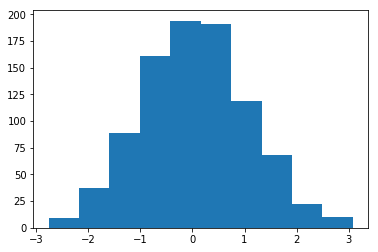

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(10,10,3)
        self.bn = nn.BatchNorm2d(10)

    def weights_init(self):
        for module in self.modules():
            if isinstance(module, nn.Conv2d):
                nn.init.normal_(module.weight, mean = 0, std = 1)  # torch..nn.init模块中可以找到大量初始化函数
                nn.init.constant_(module.bias, 0)

Net = myNet()
Net.weights_init()

for module in Net.modules():
    if isinstance(module, nn.Conv2d):
        weights = module.weight
        weights = weights.reshape(-1).detach().cpu().numpy()
        print(module.bias)                                       # Bias to zero
        plt.hist(weights)
        plt.show()

## modules() <font face=STCAIYUN color=yellow  size=5>vs</font> children()  

<font face=楷体><font face=楷体 color=skyblue  size=4>
和modules非常类似的函数是children，差异很小但很重要：
</font>

*   nn.Module对象可以包含其他nn.Module对象作为其数据成员
*   children()只返回一个调用了children()的nn.Module对象的数据成员列表


*   nn.Modulesnn.Modules在每个nn.Module对象内递归，沿着nn.Module创建包含每个对象的列表，返回所有元素（包括不同级别的子元素）

<font face=楷体 color=yellow  size=4>注意：</font>modules()还返回nn.Module它作为列表的一部分被调用的内容。   

<font face=楷体 color=skyblue>因此，当我们初始化权重时，可能要使用modules()函数，因为我们无法进入nn.Sequential对象并初始化其成员的权重
</font>

![替代文字](https://blog.paperspace.com/content/images/2019/05/children_vs_modules_pytorch-2.png)
</font>

In [ ]:
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.convBN =  nn.Sequential(nn.Conv2d(10,10,3), nn.BatchNorm2d(10))
        self.linear =  nn.Linear(10,2)

    def forward(self, x):
        pass

Net = myNet()

print("Printing children\n------------------------------")
print(list(Net.children()))
print("\n\nPrinting Modules\n------------------------------")
print(list(Net.modules()))

Printing children
------------------------------
[Sequential(
  (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
), Linear(in_features=10, out_features=2, bias=True)]


Printing Modules
------------------------------
[myNet(
  (convBN): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Linear(in_features=10, out_features=2, bias=True)
), Sequential(
  (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
), Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1)), BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Linear(in_features=10, out_features=2, bias=True)]


## 打印有关网络的信息

<font face=楷体><font face=楷体 color=skyblue  size=4>
PyTorch提供了一种非常简洁的方法，可以使用它的named_*功能打印有关网络的大量信息，有以下四个方法：
</font>

*   named_parameters ：返回一个迭代器，给出一个包含参数名称的元组（如果卷积层被指定为self.conv1，那么它的参数将是conv1.weight和conv1.bias）以及由nn.Parameter下的__ repr__函数返回的值

*   named_modules ： 与上面相同，但迭代器返回模块（类似modules()的返回）
*   与上面相同，但迭代器返回模块（类似children()的返回）


*   named_buffers ： 返回缓冲区张量，例如Bn层的移动平均值
</font>


In [ ]:
for x in Net.named_modules():
    print(x[0], x[1], "\n-------------------------------")

 myNet(
  (convBN): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Linear(in_features=10, out_features=2, bias=True)
) 
-------------------------------
convBN Sequential(
  (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
) 
-------------------------------
convBN.0 Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1)) 
-------------------------------
convBN.1 BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 
-------------------------------
linear Linear(in_features=10, out_features=2, bias=True) 
-------------------------------


## 设置不同层学习率  

<font face=楷体>
介绍如何针对不同的参数组设置不同的超参数，无论是不同层学习率，或者偏差和权重的学习率。

前面实现了CIFAR分类器，将网络所有参数作为一个整体传递给了优化器对象
</font>

In [ ]:
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10,5)
        self.fc2 = nn.Linear(5,2)

    def forward(self, x):
        return self.fc2(self.fc1(x))

Net = myNet()
optimiser = torch.optim.SGD(Net.parameters(), lr = 0.5)

<font face=楷体>
然而，torch.optim类允许以字典形式的参来设置不同学习率
</font>

In [ ]:
optimiser = torch.optim.SGD([{"params": Net.fc1.parameters(), 'lr' : 0.001, "momentum" : 0.99},
                             {"params": Net.fc2.parameters()}], lr = 0.01, momentum = 0.9)

In [ ]:
params_bias = []
params_wts = []

# seperate the bias and weights parameters
for name, parameter in Net.named_parameters():
    if "bias" in name:
        params_bias.append(parameter)
    elif "weight" in name:
        params_wts.append(parameter)

# Set the optimiser to have different hyperparameters for bias and weights
optimiser = torch.optim.SGD([{"params": params_bias, 'lr' : 0.001, "momentum" : 0.99},
                             {"params": params_wts}], lr = 0.01, momentum = 0.9)

### 学习率安排  
<font face=楷体>
torch.optim.lr_scheduler模块提供对学习速率的安排
</font>

In [ ]:
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimiser, milestones = [10,20], gamma = 0.1)

<font face=楷体 color=skyblue size=4>
    训练进行到milestones列表中包含的epoch范围时（$10\leq epoch<20$），$Learning\_rate*=gamma$  
    </font>

<font face=楷体 color=yellow size=4>注意：</font>
    <font face=楷体  >

*   训练循环一般由两个嵌套循环组成，确保scheduler.step在"epoch"循环开始时调用，而不要在"batch"循环中调用  
*   scheduler.step不能替代optim.step，每次反向传播时都要调用optim.step(在“batch”循环中)
</font>






## 保存模型  
<font face=楷体 color=skyblue size=4>PyTorch保存模型有两种选择： </font>
<font face=楷体>

*   torch.save：保存整个模型用torch.save(the_model, PATH)，相当于nn.Module的Pickle，保存后可用torch.load从内存中加载模型
*   state_dict：如果只保存模型中的参数用torch.save(model.state_dict(), PATH)，加载模型时需要自己导入模型的结构信息
</font>


In [ ]:
torch.save(Net, "net.pth")
Net = torch.load("net.pth")
print(Net)

myNet(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type myNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
for key in Net.state_dict():
    print(key, Net.state_dict()[key])

torch.save(Net.state_dict(), "net_state_dict.pth")
Net.load_state_dict(torch.load("net_state_dict.pth"))

fc1.weight tensor([[-0.0142, -0.1490,  0.2568, -0.2621, -0.0803,  0.0824,  0.1999,  0.2888,
          0.0114, -0.0053],
        [-0.0471,  0.1405, -0.1094, -0.0921,  0.2265,  0.0744,  0.1465, -0.1262,
         -0.1090, -0.2974],
        [ 0.0035, -0.0351, -0.1386, -0.2429, -0.1477, -0.1273, -0.0503,  0.0053,
          0.2148,  0.2893],
        [-0.0885,  0.2263,  0.2858, -0.0348,  0.2520, -0.2159, -0.0207,  0.2793,
         -0.2704, -0.1167],
        [ 0.1640, -0.0631, -0.3121,  0.1830,  0.2677,  0.2574, -0.2797, -0.0270,
          0.1276, -0.0990]])
fc1.bias tensor([-0.2203, -0.2941,  0.2389,  0.1853, -0.2126])
fc2.weight tensor([[-0.2143,  0.0816, -0.1487, -0.4326, -0.3264],
        [-0.1830,  0.2608, -0.1976, -0.1337,  0.3195]])
fc2.bias tensor([0.3887, 0.4306])


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

#Part- 4 内存管理和多GPU  
<font face=STCAIYUN color=skyblue size=4>**主要内容**</font>

<font face=STCAIYUN color=skyblue size=4>1. </font>  <font face=楷体>  多GPU训练网络、数据并行、模型并行     
<font face=STCAIYUN color=skyblue size=4>2.</font>   如何在创建新对象时自动选择GPU  
<font face=STCAIYUN color=skyblue size=4>3.  </font> 如何诊断和分析内存问题
</font>

## 在CPU / GPU上移动Tensor  

<font face=楷体><font face=楷体 color=skyblue>PyTorch中每个Tensor都有一个to()成员函数，其所作用是将Tensor放到某个设备上（CPU、GPU$\cdots$），to()的输入是detorch.device   </font>
    
<font face=楷体 color=skyblue>torch.cuda.is_available函数</font>检查GPU是否可用
</font>

In [ ]:
import torch
import torch.nn as nn

if torch.cuda.is_available():
	dev = "cuda:0"
else:
	dev = "cpu"

device = torch.device(dev)

a = torch.zeros(4,3)
a = a.to(device)       #alternatively, a.to(0)

<font face=楷体><font face=楷体 color=skyblue>cuda()函数： </font>将张量放在GPU上的另一种方法是调用cuda(n)，n是GPU的索引
    </font>

In [ ]:
class myNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Linear(5,1)


    def forward(self, x):
        return self.net(x)

clf = myNetwork()
clf.to(0)

myNetwork(
  (net): Linear(in_features=5, out_features=1, bias=True)
)

## 自动选择GPU  
<font face=楷体>PyTorch提供了一些函数实现自动选择GPU ，以减少代码跨设备传输  
<font face=楷体 color=skyblue>torch.get_device仅支持GPU张量，返回张量所在的GPU的索引</font>

In [ ]:
dev = a.get_device()
b = torch.tensor(a.shape).to(dev)

<font face=楷体 color=skyblue  size=4>可以设置创建GPU张量的默认设备</font>

In [ ]:
torch.cuda.set_device(0)

tens = torch.Tensor(3,4).cuda()
tens.get_device()

0

### new_ *函数  

<font face=楷体>
new_函数成为PyTorch 1.0版的一部分。  
    
<font face=楷体><font face=楷体 color=skyblue >new_ones函数：</font>返回一个相同数据类型的新张量，并且在与调用new_ones函数的张量相同的设备上

In [ ]:
ones = torch.ones((2,)).cuda(0)

# Create a tensor of ones of size (3,4) on same device as of "ones"
newOnes = ones.new_ones((3,4))

randTensor = torch.randn(2,4)
print(ones)
print(newOnes)

tensor([1., 1.], device='cuda:0')
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0')


## 多GPU
<font face=楷体>
<font face=楷体 color=skyblue size=4>两种方式要使用多个GPU：</font>
    

*   数据并行，将批次分成小批次，并在多个GPU上并行处理这些小批次。
*   模型并行，我们将神经网络分解为更小的子网络，在不同的GPU上执行这些子网络。
 </font>  






### 数据并行
<font face=楷体 color=skyblue size=4>通过nn.DataParallel类实现  </font>  
<font face=楷体>
<font face=楷体 color=skyblue>下图描述了nn.DataParallel如何工作：</font>DataParallel 获取输入，将其分成较小的批次，在所有设备上复制神经网络，执行传递，然后在原始GPU上收集输出  
     <font face=楷体 color=yellow size=4 >
        注意：
    </font>
    DataParallel可能在一个GPU（主节点）上施加不对称负载  
      <font face=楷体 color=green size=4 >
        解决方法：
    </font>   
    

*  向前传播期间计算Loss，确保损失计算阶段是并行的
*  实现一个并行的损失函数层


         
     
    
    
![替代文字](https://blog.paperspace.com/content/images/2019/04/image-4.png)
</font>

In [ ]:
parallel_net = nn.DataParallel(myNet, gpu_ids = [0,1,2])

<font face=楷体 color=skyblue >现在，可以像nn.Module一样简单地执行nn.DataParallel
</font>

In [ ]:
predictions = parallel_net(inputs)            # Forward pass on multi-GPUs
loss = loss_function(predictions, labels)     # Compute loss function
loss.mean().backward()                        # Average GPU-losses + backward pass
optimizer.step()

<font face=楷体>
    <font face=楷体 color=yellow size=4 >
        注意：
    </font>  
    

*   尽管数据在多个GPU上并行化，但必须先将其存储在单个GPU上
*   确保DataParallel对象也在特定的GPU上
      </font>

In [ ]:
input        = input.to(0)
parallel_net = parellel_net.to(0)

### 模型并行  

 <font face=楷体 color=skyblue size=4>网络太大而无法容纳在单个GPU中时 ，可将网络分成较小的子网，然后将其放在不同的GPU上</font>
  
<font face=楷体 color=yellow size=4 >
    注意：
</font>
    <font face=楷体>
    模型并行性通常比数据并行性要慢，因为将单个网络拆分为多个GPU会在GPU之间引入依赖关系，这会阻止它们以真正的并行方式运行  

<font face=楷体 color=skyblue>如图：</font>子网2在正向传递期间等待子网1，而子网1在向后传递期间等待子网2  
    
 ![替代文字](https://blog.paperspace.com/content/images/2019/04/model_parallel_steps-1.png)
    
 </font>

<font face=楷体><font face=楷体 color=skyblue size=4>
    PyTorch实现模型并行要记住两点：
</font>

*   输入和网络应始终位于同一设备上
*   to和cuda函数都支持autograd，反向传播期间可以将gradients从一个GPU复制到另一个GPU
</font>



In [ ]:
class model_parallel(nn.Module):
	def __init__(self):
		super().__init__()
		self.sub_network1 = ...
		self.sub_network2 = ...

		self.sub_network1.cuda(0)
		self.sub_network2.cuda(1)

	def forward(x):
		x = x.cuda(0)
		x = self.sub_network1(x)
		x = x.cuda(1)
		x = self.sub_network2(x)
		return x

<font face=楷体 color=skyblue>init函数将子网分别放在GPU 0和GPU 1上，在forward函数中，将中间输出从sub_network1传输到GPU 1，然后再将它传输到sub_network2</font>    
<font face=楷体 color=yellow size=4 >
注意：
    </font>
    <font face=楷体 >
    由于cuda支持autograd，sub_network2反向传播的损失将被复制到sub_network1的缓冲区，以便进一步反向传播
    </font>

## 内存管理

### 解决内存不足问题

<font face=楷体 ><font face=楷体 color=skyblue size=4>
如果网络使用的内存超出了所需的内存，如何诊断内存问题和及发现可能的解决方案?  </font>
    
内存不足可能需要减少批量大小，但可以进行一定的检查以确保内存处于最佳使用状态
    
 </font>

<font face=楷体 color=skyblue size=4>使用GPUtil跟踪内存使用情况</font>  
<font face=楷体 >
使用nvidia-smi命令监视控制台中的内存使用情况
</font>

In [ ]:
!pip install GPUtil
import GPUtil
#!nvidia-smi  # 查看GPU信息
GPUtil.showUtilization()  #放在任何想要查看GPU利用率的位置即可

  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=77da9469e1a67a6579accc709320a7abff3517639c4c9fd66a0141911a254c48
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


<font face=楷体 color=skyblue size=4>使用del关键字处理内存损失</font>  
<font face=楷体>
Python不像其他语言（如C / C ++）需要强制声明执行范围，Python变量只有在没有指针的情况下才会被释放。（这也是就是为什么变量无需在Python中声明）  
    
PyTorch有一个非常有效的垃圾回收机制(gc)。变量一旦超出范围，就会被释放  
    
<font face=楷体 color=skyblue>因此，如果训练完存储输入和输出tensos占用的内存仍无法释放，可以用del关键字</font>
</font>

In [ ]:
for x in range(10):
	i = x

print(i)   # 9 is printed

9


<font face=楷体 color=skyblue>
能在循环外打印i，说明变量i没有被释放，那么训练循环迭代也一样，用del关键字释放：
</font>

In [ ]:
del out, loss

<font face=楷体 color=skyblue size=4>用Python数据类型代替一维张量</font>  
<font face=楷体>
用PyTorch每次迭代都会更新损失，一不小心就导致内存占用过多  
可以尝试：

In [ ]:
total_loss = 0

for x in range(10):
    # assume loss is computed
    iter_loss = torch.randn(3,4).mean()
    iter_loss.requires_grad = True     # losses are supposed to differentiable
    total_loss += iter_loss            # use total_loss += iter_loss.item) instead

<font face=楷体 >
<font face=楷体 color=skyblue size=4>我们期望在随后的迭代中，对iter_loss的引用被重新分配到新的iter_loss中，并且从早期表示中表示iter_loss的对象将被释放，但这并没有发生，为什么?  </font>

由于iter_loss是可微分的，因此total_loss += iter_loss创建了具有一个AddBackward函数节点的计算图。在后续迭代期间，将AddBackward节点添加到此图中，并且不释放iter_loss对象。通常，<font face=楷体 color=yellow>分配给计算图的内存在backward被调用时被释放，但是在这里，没有调用backward  </font>

<font face=楷体 color=green size=4>**解决办法：**</font>  

将total_loss设置为python数据类型，而不是Tensor，阻止创建任何计算图  
<font face=楷体 color=yellow size=4>
疑问：  
</font>  上下文管理器呢？是否可以用torch.autograd.no_grad?
</font>
![替代文字](https://blog.paperspace.com/content/images/2019/04/loss_add_graph-1.png)

<font face=楷体 color=skyblue size=4>清空Cuda缓存</font>  
<font face=楷体 >即使对张量进行了del操作，PyTorch进程也可能不会将内存返回给OS。因为缓存此内存，可以快速将其分配给正在分配的新张量，而不需要向OS请求额外内存  
<font face=楷体 color=skyblue>但工作流程中使用两个以上的进程时，这可能是一个问题：  </font>  
第一个进程可以保留在GPU内存上，即使它在第二个进程启动时完成了工作也会导致内存不足（OOM）  

<font face=楷体 color=green size=4>解决方法：</font>  
 可以在代码末尾编写命令：
</font>  

In [ ]:
torch.cuda.empy_cache()  # 确保释放进程占用的空间

In [ ]:
import torch
from GPUtil import showUtilization as gpu_usage

print("Initial GPU Usage")
gpu_usage()

tensorList = []
for x in range(10):
    tensorList.append(torch.randn(10000000,10).cuda())   # reduce the size of tensor if you are getting OOM


print("GPU Usage after allcoating a bunch of Tensors")
gpu_usage()

del tensorList

print("GPU Usage after deleting the Tensors")
gpu_usage()

print("GPU Usage after emptying the cache")
torch.cuda.empty_cache()
gpu_usage()

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |
GPU Usage after allcoating a bunch of Tensors
| ID | GPU | MEM |
------------------
|  0 |  0% | 36% |
GPU Usage after deleting the Tensors
| ID | GPU | MEM |
------------------
|  0 | 33% | 36% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 | 99% |  3% |


<font face=楷体 color=skyblue size=4>使用torch.no_grad()进行Inference</font>  
<font face=楷体>
默认情况下，PyTorch将在正向传递期间创建计算图。在创建该图形期间，它将分配缓冲区来存储梯度和中间值，这些值用于在向后传递期间计算梯度  
反向传播期间，释放所有这些缓冲区，但leaf variables缓冲区除外  
<font color=skyblue>但是，在Inference期间，并不会进行反向传播，这些缓冲区永远不会被释放，从而导致堆积内存</font>   
因此，要执行一段不需要反向传播的代码时，将其放在torch.no_grad()上下文管理器中
</font>  

In [ ]:
with torch.no_grad()
	# your code

<font face=楷体 color=skyblue size=4>使用CuDNN后端</font>  

<font face=楷体>
CuDNN可以提供很多优化，可以降低你的空间使用量，特别是当神经网络的输入具有固定大小时，在代码顶部添加以下行以启用CuDNN benchmark
</font>

In [ ]:
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.enabled = True

<font face=楷体 color=skyblue size=4>使用16位浮点数  </font>  
<font face=楷体>nVidia的新RTX和Volta支持16位训练和inference.</font>

<font face=楷体 color=skyblue size=4>虽然使用16位张量可以将GPU的使用减少近一半，但也存在一些问题：  </font>

<font face=楷体>
1、批处理规范层具有半精度浮点数收敛问题。如果是这种情况，请确保批量标准层为float32  
    
2、16位浮点数可能存在溢出问题，确保限制所储存的值
    </font>

In [ ]:
model.half()  # convert to half precision
for layer in model.modules():
    if isinstance(layer, nn.BatchNorm2d):
        layer.float()

<font face=楷体 color=yellow size=4>注意：</font><font face=楷体>确保当输出在forward函数中的不同层间传递时，批量规范图层的输入要从float16转换为float32，然后输出需要转换回float16</font>

# Part-5 了解Hooks  


PyTorch提供两种类型的钩子：
*   The Forward Hook
*   The Backward Hook  

注意：这些都是torch.Autograd.Function对象的forward和backward被调用时执行





## Hooks for Tensors

In [ ]:
hook(grad) -> Tensor or None

In [ ]:
import torch
a = torch.ones(5)
a.requires_grad = True

b = 2*a

b.retain_grad()   # Since b is non-leaf and it's grad will be destroyed otherwise.

c = b.mean()

c.backward()

print(a.grad, b.grad)

# Redo the experiment but with a hook that multiplies b's grad by 2.
a = torch.ones(5)

a.requires_grad = True

b = 2*a

b.retain_grad()

b.register_hook(lambda x: print(x))

b.mean().backward()


print(a.grad, b.grad)

tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000]) tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000]) tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])


In [ ]:
a = torch.ones(5)

a.requires_grad = True
b = 2*a

b.retain_grad()


b.mean().backward()


print(a.grad, b.grad)

b.grad *= 2

print(a.grad, b.grad)       # a's gradient needs to updated manually

## Hooks for nn.Module objects  
For nn.Module object, the signature for the hook function,

In [ ]:
hook(module, grad_input, grad_output) -> Tensor or None

for the backward hook, and

In [ ]:
hook(module, input, output) -> None

In [ ]:
import torch
import torch.nn as nn

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3,10,2, stride = 2)
        self.relu = nn.ReLU()
        self.flatten = lambda x: x.view(-1)
        self.fc1 = nn.Linear(160,5)

    def forward(self, x):
        x = self.relu(self.conv(x))
        return self.fc1(self.flatten(x))

net = myNet()

def hook_fn(m, i, o):
    print(m)
    print("------------Input Grad------------")

    for grad in i:
        try:
            print(grad.shape)
        except AttributeError:
            print ("None found for Gradient")

    print("------------Output Grad------------")
    for grad in o:
        try:
            print(grad.shape)
        except AttributeError:
            print ("None found for Gradient")
    print("\n")
net.conv.register_backward_hook(hook_fn)
net.fc1.register_backward_hook(hook_fn)
inp = torch.randn(1,3,8,8)
out = net(inp)

(1 - out.mean()).backward()

Linear(in_features=160, out_features=5, bias=True)
------------Input Grad------------
torch.Size([5])
torch.Size([5])
------------Output Grad------------
torch.Size([5])


Conv2d(3, 10, kernel_size=(2, 2), stride=(2, 2))
------------Input Grad------------
None found for Gradient
torch.Size([10, 3, 2, 2])
torch.Size([10])
------------Output Grad------------
torch.Size([1, 10, 4, 4])




## 正确使用钩子的方法

In [ ]:
import torch
import torch.nn as nn

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3,10,2, stride = 2)
        self.relu = nn.ReLU()
        self.flatten = lambda x: x.view(-1)
        self.fc1 = nn.Linear(160,5)

    def forward(self, x):
        x = self.relu(self.conv(x))
        x.register_hook(lambda grad : torch.clamp(grad, min = 0))     #No gradient shall be backpropagated
                                                                  #conv outside less than 0
        # print whether there is any negative grad
        x.register_hook(lambda grad: print("Gradients less than zero:", bool((grad < 0).any())))
        return self.fc1(self.flatten(x))

net = myNet()

for name, param in net.named_parameters():
    # if the param is from a linear and is a bias
    if "fc" in name and "bias" in name:
        param.register_hook(lambda grad: torch.zeros(grad.shape))


out = net(torch.randn(1,3,8,8))

(1 - out).mean().backward()

print("The biases are", net.fc1.bias.grad)     #bias grads are zero

Gradients less than zero: False
The biases are tensor([0., 0., 0., 0., 0.])


## The Forward Hook for Visualising Activations

In [ ]:
visualisation = {}

inp = torch.randn(1,3,8,8)

def hook_fn(m, i, o):
    visualisation[m] = o

net = myNet()

for name, layer in net._modules.items():
    layer.register_forward_hook(hook_fn)

out = net(inp)

In [ ]:
import torch
import torch.nn as nn

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3,10,2, stride = 2)
        self.relu = nn.ReLU()
        self.flatten = lambda x: x.view(-1)
        self.fc1 = nn.Linear(160,5)
        self.seq = nn.Sequential(nn.Linear(5,3), nn.Linear(3,2))

    def forward(self, x):
        x = self.relu(self.conv(x))
        x = self.fc1(self.flatten(x))
        x = self.seq(x)

net = myNet()
visualisation = {}

def hook_fn(m, i, o):
    visualisation[m] = o

def get_all_layers(net):
    for name, layer in net._modules.items():
    #If it is a sequential, don't register a hook on it
    # but recursively register hook on all it's module children
        if isinstance(layer, nn.Sequential):
            get_all_layers(layer)
        else:
            # it's a non sequential. Register a hook
            layer.register_forward_hook(hook_fn)

get_all_layers(net)


out = net(torch.randn(1,3,8,8))

# Just to check whether we got all layers
visualisation.keys()      #output includes sequential layers

dict_keys([Conv2d(3, 10, kernel_size=(2, 2), stride=(2, 2)), ReLU(), Linear(in_features=160, out_features=5, bias=True), Linear(in_features=5, out_features=3, bias=True), Linear(in_features=3, out_features=2, bias=True)])

***
# 搭建神经网络
用 torch.nn 包搭建神经网络  

nn建立在autograd的基础上来进行模型的定义和微分  
**一个典型的神经网络的训练过程：**

1、定义一个有着可学习的参数（或者权重）的神经网络  
2、对着一个输入的数据集进行迭代:  
3、用神经网络对输入进行处理  
4、计算代价值 (对输出值的修正到底有多少)  
5、将梯度传播回神经网络的参数中  
6、更新网络中的权重  
$\qquad$通常使用简单的更新规则: weight = weight + learning_rate * gradient  

  
  
  


##定义一个神经网络
定义一个<font color=geen>**forward函数**</font>，backward会自动地生成， 可以在forward函数中使用所有的Tensor中的操作，模型中可学习的参数会由<font color=geen>**net.parameters()**</font>返回。

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120) # an affine operation: y = Wx + b
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))  # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))  # ？？？？？？？？？？？？？？？？？
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## 输入
**注意：** torch.nn包只接受小批量样本，而非单个样本。     
例如：nn.Conv2d能够接受四维的$TensornSamples \times nChannels \times Height \times Width$批量样本，
如果非要用单个样本，使用input.unsqueeze(0)来加一个假维度就可以了。

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)

10
torch.Size([6, 1, 5, 5])


## 反向传播

In [ ]:
net.zero_grad() # 对所有的参数的梯度缓冲区进行归零
out.backward(torch.randn(1, 10)) # 使用随机的梯度进行反向传播

##计算loss

In [ ]:
output = net(input)
target = Variable(torch.range(1, 10))  # a dummy target, for example
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(38.5381, grad_fn=<MseLossBackward>)

In [ ]:
print(loss.grad_fn) # creator貌似被grad_fn代替了
print(loss.grad_fn.previous_functions[0][0]) # Linear
print(loss.grad_fn.previous_functions[0][0].previous_functions[0][0]) # ReLU

调用loss.backward()，看看 conv1's在进行反馈之后的偏置梯度如何

In [ ]:
# 调用loss.backward(), 看看 conv1's在进行反馈之后的偏置梯度如何
net.zero_grad() # 归零操作
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0193, -0.0114,  0.0311,  0.0051, -0.0441, -0.0320])


***
## 更新权重

最简单的就是**随机梯度下降法(SGD)：**
  ~~~
weight = weight - learning_rate * gradient
  ~~~
**简单的python实现：**
  ~~~
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
~~~
还有许多不同种类的方法：**SGD, Nesterov-SGD, Adam, RMSProp, etc**，这些方法都可以用**torch.optim包**来实现